In [9]:
import pandas as pd
data_dict ={}
data_files={"ap_2010.csv",
    "Class_Size.csv",
    "Demographics.csv",
    "Graduation.csv",
    "Hs_Directory.csv",
    "Sat_Result.csv"}
for d in data_files:
    df=d.replace(".csv","")
    data_dict[df] =pd.read_csv(d)
    

In [15]:
for d in data_dict:
    print(data_dict[d].head(3))

      DBN                    SchoolName  AP Test Takers   Total Exams Taken  \
0  01M448  UNIVERSITY NEIGHBORHOOD H.S.             39.0               49.0   
1  01M450        EAST SIDE COMMUNITY HS             19.0               21.0   
2  01M515           LOWER EASTSIDE PREP             24.0               26.0   

   Number of Exams with scores 3 4 or 5  
0                                  10.0  
1                                   NaN  
2                                  24.0  
    Demographic     DBN                            School Name Cohort  \
0  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2003   
1  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2004   
2  Total Cohort  01M292  HENRY STREET SCHOOL FOR INTERNATIONAL   2005   

   Total Cohort Total Grads - n  Total Grads - % of cohort Total Regents - n  \
0             5               s                        NaN                 s   
1            55              37                       67.3    

In [50]:
# Reading survey files
survey = pd.read_csv("Survey.txt", delimiter="\t", encoding='windows-1252')
survey_d75 = pd.read_csv("Survey_d75.txt", delimiter="\t", encoding='windows-1252')
survey_comb = pd.concat([survey, survey_d75], axis=0, sort=True)

In [51]:
survey_comb['dbn'].head(5)

0    01M015
1    01M019
2    01M020
3    01M034
4    01M063
Name: dbn, dtype: object

In [53]:
survey_comb.rename({'dbn':'DBN'}, inplace=True, axis=1)

In [54]:
survey_comb['DBN'].head()

0    01M015
1    01M019
2    01M020
3    01M034
4    01M063
Name: DBN, dtype: object

In [55]:
survey_comb.shape


(1702, 2773)

In [57]:
# We will not need all columns, selecting only columns we require
survey_cols = [
    "DBN", 
    "rr_s", 
    "rr_t", 
    "rr_p", 
    "N_s", 
    "N_t", 
    "N_p", 
    "saf_p_11", 
    "com_p_11", 
    "eng_p_11", 
    "aca_p_11", 
    "saf_t_11", 
    "com_t_11", 
    "eng_t_11", 
    "aca_t_11", 
    "saf_s_11", 
    "com_s_11", 
    "eng_s_11", 
    "aca_s_11", 
    "saf_tot_11", 
    "com_tot_11", 
    "eng_tot_11", 
    "aca_tot_11",
]
survey = survey_comb[survey_cols]
data_dict["survey"] = survey

In [58]:
data_dict["survey"].shape

(1702, 23)

In [64]:
data_dict["Hs_Directory"].rename({'dbn':'DBN'}, axis=1, inplace=True)

In [65]:
data_dict["Hs_Directory"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 64 columns):
DBN                                 435 non-null object
school_name                         435 non-null object
borough                             435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      432 non-null float64
grade_span_max                      435 non-null int64
expgrade_span_min                   31 non-null float64
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
postcode                            435 non-null int64


In [67]:
data_dict["Class_Size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN


In [68]:
#Creating a DBN column on combining School Code and CSD columns
data_dict["Class_Size"].info()
# CSD is an int type, we need to convert to string and combine with school code

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 16 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

In [71]:
# since the CSD value in DBN is 2 characters, we have to append 0 to CSD whose length is 1 character
def pre_zero(value):
    csd_str = str(value)
    if len(csd_str) > 1:
        return csd_str
    else:
        return "0" + csd_str
    
data_dict["Class_Size"]["updated_csd"] = data_dict["Class_Size"]["CSD"].apply(pre_zero)
# Now adding updated csd to school code to generate DBN value
data_dict["Class_Size"]["DBN"] = data_dict["Class_Size"]["updated_csd"] + data_dict["Class_Size"]["SCHOOL CODE"]


In [76]:
data_dict["Class_Size"]["DBN"]

0        01M015
1        01M015
2        01M015
3        01M015
4        01M015
          ...  
27606    32K564
27607    32K564
27608    32K564
27609    32K564
27610    32K564
Name: DBN, Length: 27611, dtype: object

In [79]:
# In Sat_RESULTS dataset, we have scores for individual sections of SAT exam. Adding them to generate total SAT score
data_dict['Sat_Result'].head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355,404,363
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383,423,366
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377,402,370
3,01M458,FORSYTH SATELLITE ACADEMY,7,414,401,359
4,01M509,MARTA VALLE HIGH SCHOOL,44,390,433,384


In [80]:
data_dict["Sat_Result"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 6 columns):
DBN                                478 non-null object
SCHOOL NAME                        478 non-null object
Num of SAT Test Takers             478 non-null object
SAT Critical Reading Avg. Score    478 non-null object
SAT Math Avg. Score                478 non-null object
SAT Writing Avg. Score             478 non-null object
dtypes: object(6)
memory usage: 22.5+ KB


In [103]:
cols=[ 'SAT Critical Reading Avg. Score'
      , 'SAT Math Avg. Score' ,'SAT Writing Avg. Score']

for c in cols:
    data_dict["Sat_Result"][c] = pd.to_numeric(data_dict["Sat_Result"][c], errors="coerce")

data_dict['Sat_Result']['sat_total'] = data_dict['Sat_Result'][cols[0]] + data_dict['Sat_Result'][cols[1]] + data_dict['Sat_Result'][cols[2]]


In [107]:

data_dict["ap_2010"].head()

,DBN,SchoolName,AP Test Takers,Total Exams Taken,Number of Exams with scores 3 4 or 5
0,01M448,UNIVERSITY NEIGHBORHOOD H.S.,39.0,49.0,10.0
1,01M450,EAST SIDE COMMUNITY HS,19.0,21.0,NaN
2,01M515,LOWER EASTSIDE PREP,24.0,26.0,24.0
3,01M539,"NEW EXPLORATIONS SCI,TECH,MATH",255.0,377.0,191.0
4,02M296,High School of Hospitality Management,NaN,NaN,NaN


In [86]:
#Finding the latitude and longitude
import re
def latitude(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lat = coords[0].split(",")[0].replace("(", "")
    return lat

def longitude(loc):
    coords = re.findall("\(.+, .+\)", loc)
    lon = coords[0].split(",")[1].replace(")", "").strip()
    return lon

data_dict["Hs_Directory"]["latitude"] = data_dict["Hs_Directory"]["Location 1"].apply(latitude)
data_dict["Hs_Directory"]["longitude"] = data_dict["Hs_Directory"]["Location 1"].apply(longitude)


In [98]:
data_dict["Hs_Directory"].head()

,DBN,school_name,borough,building_code,phone_number,fax_number,grade_span_min,grade_span_max,expgrade_span_min,expgrade_span_max,...,priority10,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,latitude,longitude
0,21K540,John Dewey High School,Brooklyn,K540,718-373-6400,718-266-4385,9.0,12,NaN,NaN,...,NaN,"50 Avenue\nX Brooklyn, NY 11223\n(40.589238098...",13.0,47.0,308.0,3194998.0,3.071850e+09,Gravesend ...,40.589238098,-73.981746524
1,15K429,Brooklyn School for Global Studies,Brooklyn,K293,718-694-9741,718-694-9745,6.0,12,NaN,NaN,...,NaN,"284 Baltic Street\nBrooklyn, NY 11201\n(40.685...",6.0,33.0,69.0,3006401.0,3.004020e+09,DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hi...,40.685451806,-73.993491465
2,24Q530,International High School at LaGuardia Communi...,Queens,Q520,718-392-3433,718-392-3443,9.0,12,NaN,NaN,...,NaN,"45 35 Van Dam Street\nLong Island City, NY 111...",2.0,26.0,179.0,4003442.0,4.002490e+09,Hunters Point-Sunnyside-West Maspeth ...,40.744149536,-73.933626741
3,05M367,Academy for Social Action: A College Board School,Manhattan,M043,212-234-3102,212-234-8597,9.0,12,NaN,NaN,...,NaN,"509 West 129 Street\nNew York, NY 10027\n(40.8...",9.0,7.0,219.0,1059723.0,1.019840e+09,Manhattanville ...,40.815230365,-73.955201206
4,27Q260,Frederick Douglass Academy VI High School,Queens,Q465,718-471-2154,718-471-2890,9.0,12,NaN,NaN,...,NaN,"8 21 Bay 25 Street\nFar Rockaway, NY 11691\n(4...",14.0,31.0,100802.0,4300730.0,4.157360e+09,Far Rockaway-Bayswater ...,40.601989336,-73.762834323


In [99]:
data_dict["Hs_Directory"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 66 columns):
DBN                                 435 non-null object
school_name                         435 non-null object
borough                             435 non-null object
building_code                       435 non-null object
phone_number                        435 non-null object
fax_number                          423 non-null object
grade_span_min                      432 non-null float64
grade_span_max                      435 non-null int64
expgrade_span_min                   31 non-null float64
expgrade_span_max                   33 non-null float64
bus                                 434 non-null object
subway                              358 non-null object
primary_address_line_1              435 non-null object
city                                435 non-null object
state_code                          435 non-null object
postcode                            435 non-null int64


In [100]:
#converting longitude and latitide strings to numeric values

data_dict["Hs_Directory"]["latitude"] = pd.to_numeric(data_dict["Hs_Directory"]["latitude"], errors="coerce")
data_dict["Hs_Directory"]["longitude"] = pd.to_numeric(data_dict["Hs_Directory"]["longitude"], errors="coerce")

In [109]:
data_dict["Class_Size"].head()

,CSD,BOROUGH,SCHOOL CODE,SCHOOL NAME,GRADE,PROGRAM TYPE,CORE SUBJECT (MS CORE and 9-12 ONLY),CORE COURSE (MS CORE and 9-12 ONLY),SERVICE CATEGORY(K-9* ONLY),NUMBER OF STUDENTS / SEATS FILLED,NUMBER OF SECTIONS,AVERAGE CLASS SIZE,SIZE OF SMALLEST CLASS,SIZE OF LARGEST CLASS,DATA SOURCE,SCHOOLWIDE PUPIL-TEACHER RATIO,updated_csd,DBN
0,1,M,M015,P.S. 015 Roberto Clemente,0K,GEN ED,-,-,-,19.0,1.0,19.0,19.0,19.0,ATS,NaN,01,01M015
1,1,M,M015,P.S. 015 Roberto Clemente,0K,CTT,-,-,-,21.0,1.0,21.0,21.0,21.0,ATS,NaN,01,01M015
2,1,M,M015,P.S. 015 Roberto Clemente,01,GEN ED,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
3,1,M,M015,P.S. 015 Roberto Clemente,01,CTT,-,-,-,17.0,1.0,17.0,17.0,17.0,ATS,NaN,01,01M015
4,1,M,M015,P.S. 015 Roberto Clemente,02,GEN ED,-,-,-,15.0,1.0,15.0,15.0,15.0,ATS,NaN,01,01M015


In [110]:
data_dict["Class_Size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

In [111]:
data_dict["Class_Size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27611 entries, 0 to 27610
Data columns (total 18 columns):
CSD                                     27611 non-null int64
BOROUGH                                 27611 non-null object
SCHOOL CODE                             27611 non-null object
SCHOOL NAME                             27611 non-null object
GRADE                                   26127 non-null object
PROGRAM TYPE                            26127 non-null object
CORE SUBJECT (MS CORE and 9-12 ONLY)    26127 non-null object
CORE COURSE (MS CORE and 9-12 ONLY)     26127 non-null object
SERVICE CATEGORY(K-9* ONLY)             26127 non-null object
NUMBER OF STUDENTS / SEATS FILLED       26127 non-null float64
NUMBER OF SECTIONS                      26127 non-null float64
AVERAGE CLASS SIZE                      26127 non-null float64
SIZE OF SMALLEST CLASS                  26127 non-null float64
SIZE OF LARGEST CLASS                   26127 non-null float64
DATA SOURCE        

In [114]:
# Filtering the class size data to include only high school(Grade 9 to 12) and GEN ED students
import numpy as np

class_size = data_dict["Class_Size"]
class_size = class_size[class_size["GRADE "] == "09-12"]
class_size = class_size[class_size["PROGRAM TYPE"] == "GEN ED"]

class_size = class_size.groupby("DBN").agg(np.mean)
class_size.reset_index(inplace=True)
data_dict["Class_Size"] = class_size

In [115]:
data_dict["Class_Size"].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 8 columns):
DBN                                  583 non-null object
CSD                                  583 non-null int64
NUMBER OF STUDENTS / SEATS FILLED    583 non-null float64
NUMBER OF SECTIONS                   583 non-null float64
AVERAGE CLASS SIZE                   583 non-null float64
SIZE OF SMALLEST CLASS               583 non-null float64
SIZE OF LARGEST CLASS                583 non-null float64
SCHOOLWIDE PUPIL-TEACHER RATIO       0 non-null float64
dtypes: float64(6), int64(1), object(1)
memory usage: 36.6+ KB


In [116]:
data_dict["Demographics"] = data_dict["Demographics"][data_dict["Demographics"]["schoolyear"] == 20112012]

data_dict["Graduation"] = data_dict["Graduation"][data_dict["Graduation"]["Cohort"] == "2006"]
data_dict["Graduation"] = data_dict["Graduation"][data_dict["Graduation"]["Demographic"] == "Total Cohort"]


In [119]:
# Combining data sets
combined = data_dict["Sat_Result"]
combined = combined.merge(data_dict["ap_2010"], on="DBN", how="left")
combined = combined.merge(data_dict["Graduation"], on="DBN", how="left")

to_merge = ["Class_Size", "Demographics", "survey", "Hs_Directory"]

for ds in to_merge:
    combined = combined.merge(data_dict[ds], on="DBN", how="inner")

combined = combined.fillna(combined.mean())
combined = combined.fillna(0)

In [124]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Columns: 164 entries, DBN to longitude
dtypes: float64(69), int64(16), object(79)
memory usage: 467.9+ KB


In [125]:
# adding a school district column

def school_dist(dbn):
    return dbn[0:2]

combined["school_dist"] = combined["DBN"].apply(school_dist)

In [126]:
combined.head()

,DBN,SCHOOL NAME,Num of SAT Test Takers,SAT Critical Reading Avg. Score,SAT Math Avg. Score,SAT Writing Avg. Score,sat_total,SchoolName,AP Test Takers,Total Exams Taken,...,Location 1,Community Board,Council District,Census Tract,BIN,BBL,NTA,latitude,longitude,school_dist
0,01M292,HENRY STREET SCHOOL FOR INTERNATIONAL STUDIES,29,355.0,404.0,363.0,1122.0,0,129.028846,197.038462,...,"220 Henry Street\nNew York, NY 10002\n(40.7137...",3.0,1.0,201.0,1003223.0,1.002690e+09,Lower East Side ...,40.713764,-73.985260,01
1,01M448,UNIVERSITY NEIGHBORHOOD HIGH SCHOOL,91,383.0,423.0,366.0,1172.0,UNIVERSITY NEIGHBORHOOD H.S.,39.000000,49.000000,...,"200 Monroe Street\nNew York, NY 10002\n(40.712...",3.0,1.0,202.0,1003214.0,1.002590e+09,Lower East Side ...,40.712332,-73.984797,01
2,01M450,EAST SIDE COMMUNITY SCHOOL,70,377.0,402.0,370.0,1149.0,EAST SIDE COMMUNITY HS,19.000000,21.000000,...,"420 East 12 Street\nNew York, NY 10009\n(40.72...",3.0,2.0,34.0,1005974.0,1.004390e+09,East Village ...,40.729783,-73.983041,01
3,01M509,MARTA VALLE HIGH SCHOOL,44,390.0,433.0,384.0,1207.0,0,129.028846,197.038462,...,"145 Stanton Street\nNew York, NY 10002\n(40.72...",3.0,1.0,3001.0,1004323.0,1.003540e+09,Chinatown ...,40.720569,-73.985673,01
4,01M539,"NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...",159,522.0,574.0,525.0,1621.0,"NEW EXPLORATIONS SCI,TECH,MATH",255.000000,377.000000,...,"111 Columbia Street\nNew York, NY 10002\n(40.7...",3.0,2.0,2201.0,1004070.0,1.003350e+09,Lower East Side ...,40.718725,-73.979426,01


In [129]:
# Finding correlations

correlations = combined.corr()
correlations = correlations["sat_total"]
print(round(correlations,2))



SAT Critical Reading Avg. Score    0.99
SAT Math Avg. Score                0.97
SAT Writing Avg. Score             0.99
sat_total                          1.00
AP Test Takers                     0.52
                                   ... 
Census Tract                       0.05
BIN                                0.05
BBL                                0.04
latitude                          -0.12
longitude                         -0.13
Name: sat_total, Length: 85, dtype: float64


# Visualizing Survey correlations


In [130]:
# Excluding DBN since it is not a useful numerical value for correlation.
survey_cols.remove("DBN")

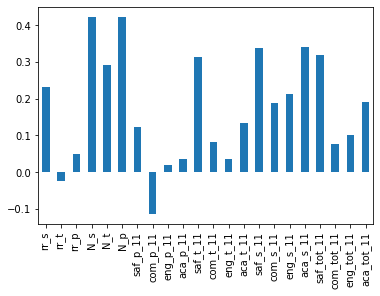

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline
combined.corr()["sat_total"][survey_cols].plot.bar()
plt.show()

High correlations between N_s, N_t, N_p and sat_score. Since these columns are correlated with total_enrollment, it makes sense that they would be high.

How students and teachers percieved safety (saf_t_11 and saf_s_11) correlate with sat_score. This make sense, as it's hard to teach or learn in an unsafe environment.

The students preception of academic standards(aca_s_11) correlates highlly with sat score, however, this is not true for aca_t_11, how teachers perceive academic standards, or aca_p_11, how parents perceive academic standards.

# Plotting Safety

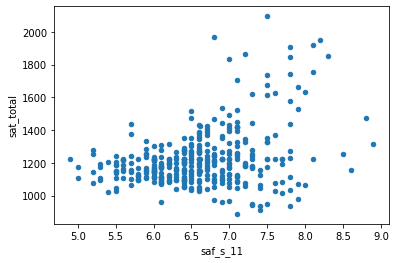

In [135]:
combined.plot.scatter("saf_s_11", "sat_total")


There is a sufficient correlation between safety and sat total score. There is no school with a safety score lower than 6.5 has an average SAT score higher than 1500.

# Correlation with race

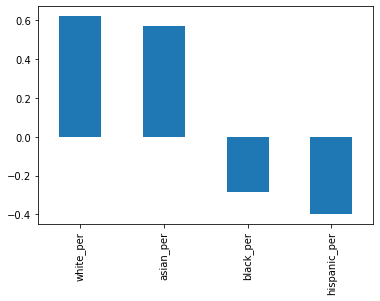

In [140]:
races = ["white_per", "asian_per", "black_per", "hispanic_per"]
combined.corr()["sat_total"][races].plot.bar()
plt.show()

Higher percentage of white or asian students at a school correlates positively with sat score, and a higher percentage of black or hispanic students correlates negatively with sat score.

# Gender differences in SAT score

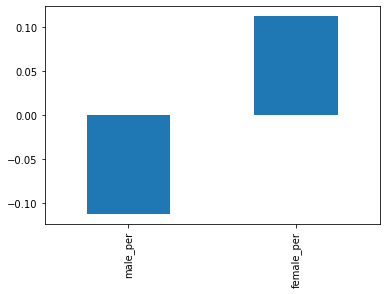

In [141]:
genders = ["male_per","female_per"]
combined.corr()["sat_total"][genders].plot.bar()
plt.show()

Higher percentage of females at a school positively correlates with SAT score, whereas a high percentage of males at a school negatively correlates with SAT score.

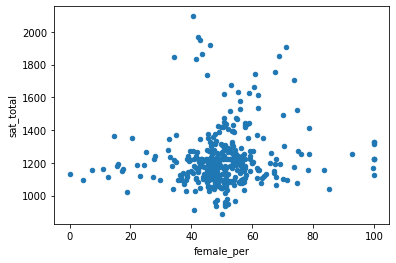

In [143]:
combined.plot.scatter("female_per", "sat_total")

There is no strong correlation between sat_score and female_per. However, there are schools with a high percentage of females (40 to 80), and high SAT scores.

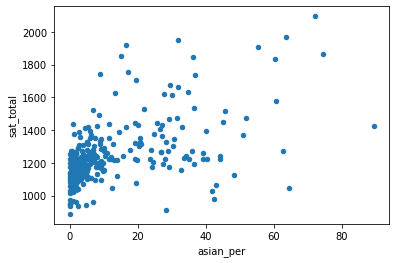

In [152]:
combined.plot.scatter("asian_per", "sat_total")


There is no strong relation between percentage of asians in school and sat score. There are schools where asian percentage is less than 20 and has sat score greater than 1600. 

In [162]:
def print_school(col, perc, score):
    print(combined[(combined[col] < perc) & (combined["sat_total"] > score)][["SCHOOL NAME", col]])

    
print_school('hispanic_per', 30, 1500)

                                           SCHOOL NAME  hispanic_per
4    NEW EXPLORATIONS INTO SCIENCE, TECHNOLOGY AND ...          14.2
5                       BARD HIGH SCHOOL EARLY COLLEGE          18.2
22            PROFESSIONAL PERFORMING ARTS HIGH SCHOOL          23.7
23                   BARUCH COLLEGE CAMPUS HIGH SCHOOL          14.6
24         N.Y.C. LAB SCHOOL FOR COLLABORATIVE STUDIES          14.0
26                       ELEANOR ROOSEVELT HIGH SCHOOL          11.6
27                              MILLENNIUM HIGH SCHOOL          21.7
37                              STUYVESANT HIGH SCHOOL           2.4
60                                  BEACON HIGH SCHOOL          22.8
61   FIORELLO H. LAGUARDIA HIGH SCHOOL OF MUSIC & A...          16.6
79   HIGH SCHOOL FOR MATHEMATICS, SCIENCE AND ENGIN...          21.2
151                       BRONX HIGH SCHOOL OF SCIENCE           7.2
155  HIGH SCHOOL OF AMERICAN STUDIES AT LEHMAN COLLEGE          18.0
187                     BROOKLYN T